In [1]:
%load_ext autoreload
%autoreload 2

import ncem

import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
from scipy.stats import ttest_rel, ttest_ind

usr = !echo $USER
grid_search_dir = '.'
datadir = '.'

datadir = '/storage/groups/ml01/workspace/anna.schaar/ncem/data/'
grid_search_dir = '/storage/groups/ml01/workspace/anna.schaar/ncem/grid_searches/'

In [2]:
sc.settings.set_figure_params(dpi=80)

In [3]:
interpreter = ncem.interpretation.InterpreterInteraction()
interpreter.get_data(
    data_path=datadir + '/salas/',
    data_origin='salasiss',
    radius=100,
    node_label_space_id='type',
    node_feature_space_id='standard',
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


collecting image-wise celldata
adding graph-level covariates


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.65s/it]

Loaded 1 images with complete data from 1 patients over 265663 cells with 89 cell features and 18 distinct celltypes.
Mean of mean node degree per images across images: 10.327844

 Celldata metadata: {'lateral_resolution': 1.0, 'fn': 'Cell_type/PCW13/S1T1_pciseq_mALL_pciseq_results_V02.csv', 'cluster_col': 'name', 'cluster_col_preprocessed': 'name_preprocessed', 'pos_cols': ['X', 'Y']}


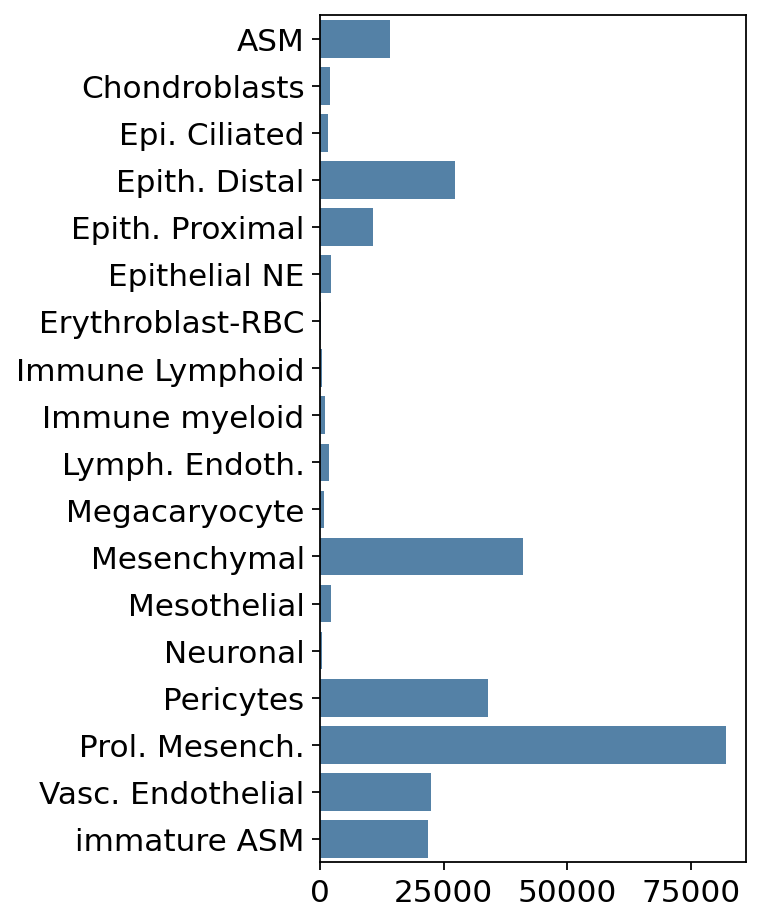

In [4]:
interpreter.data.celltype_frequencies()

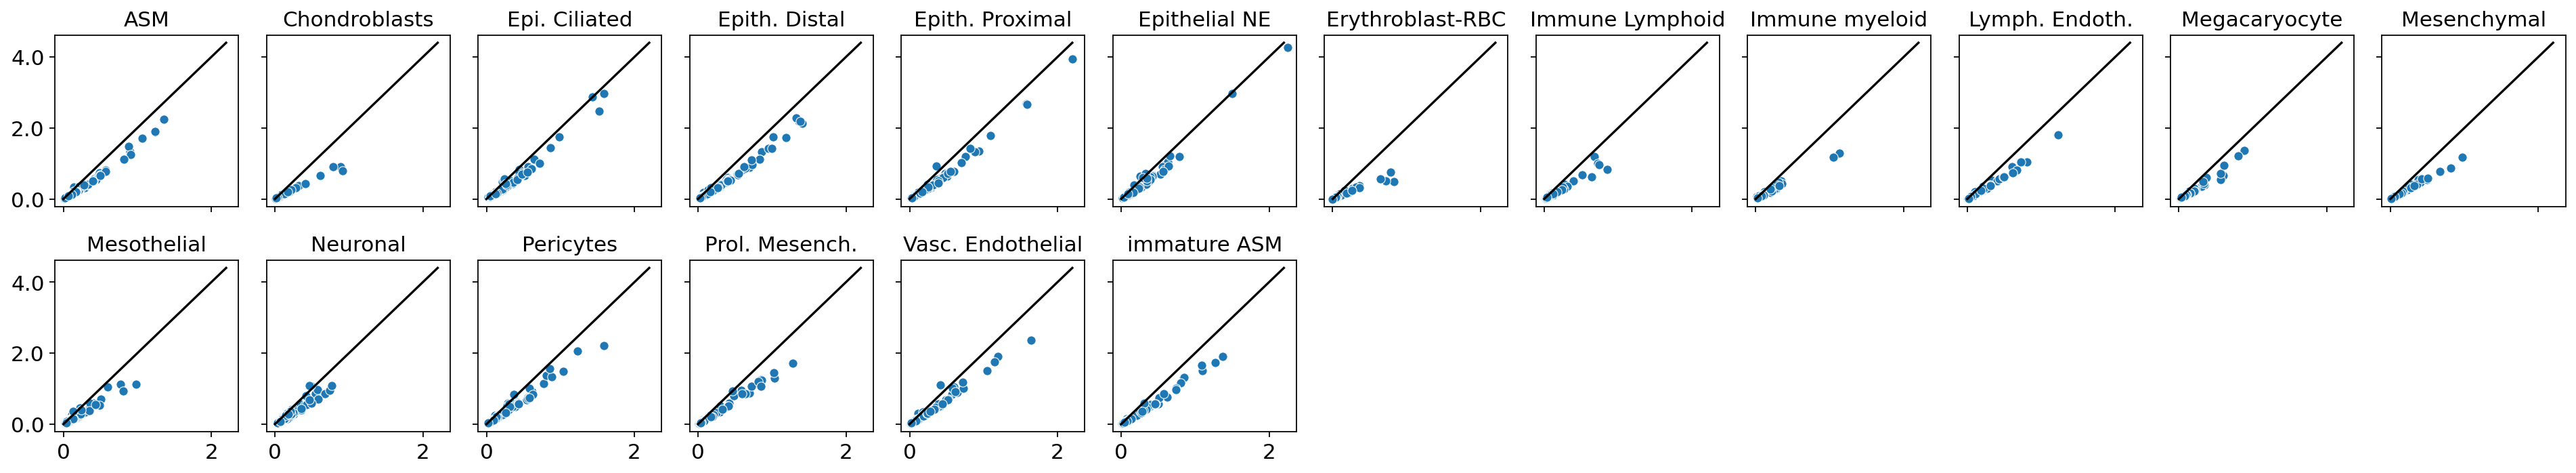

In [5]:
interpreter.data.noise_structure(min_x=0.0, max_x=2.2)

In [6]:
interpreter.split_data_node(0.1, 0.1)
interpreter.n_eval_nodes_per_graph = 1000
interpreter.cell_names = list(interpreter.data.celldata.uns['node_type_names'].values())

Using split method: node. 
 Train-test-validation split is based on total number of nodes per patients over all images.

Excluded 0 cells with the following unannotated cell type: [None] 

Whole dataset: 265663 cells out of 1 images from 1 patients.
Test dataset: 26566 cells out of 1 images from 1 patients.
Training dataset: 216304 cells out of 1 images from 1 patients.
Validation dataset: 23910 cells out of 1 images from 1 patients. 



In [7]:
interpreter.get_sender_receiver_effects()

2022-03-04 15:22:11.494918: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-04 15:22:12.342993: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30157 MB memory:  -> device: 0, name: Tesla V100-SXM3-32GB, pci bus id: 0000:96:00.0, compute capability: 7.0
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 265/265 [11:34<00:00,  2.62s/it]


using ols parameters.
calculating inv fim.


/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/diffxpy/stats/stats.py:216: RuntimeWarning: divide by zero encountered in true_divide
  wald_statistic = np.abs(np.divide(theta_mle - theta0, theta_sd))


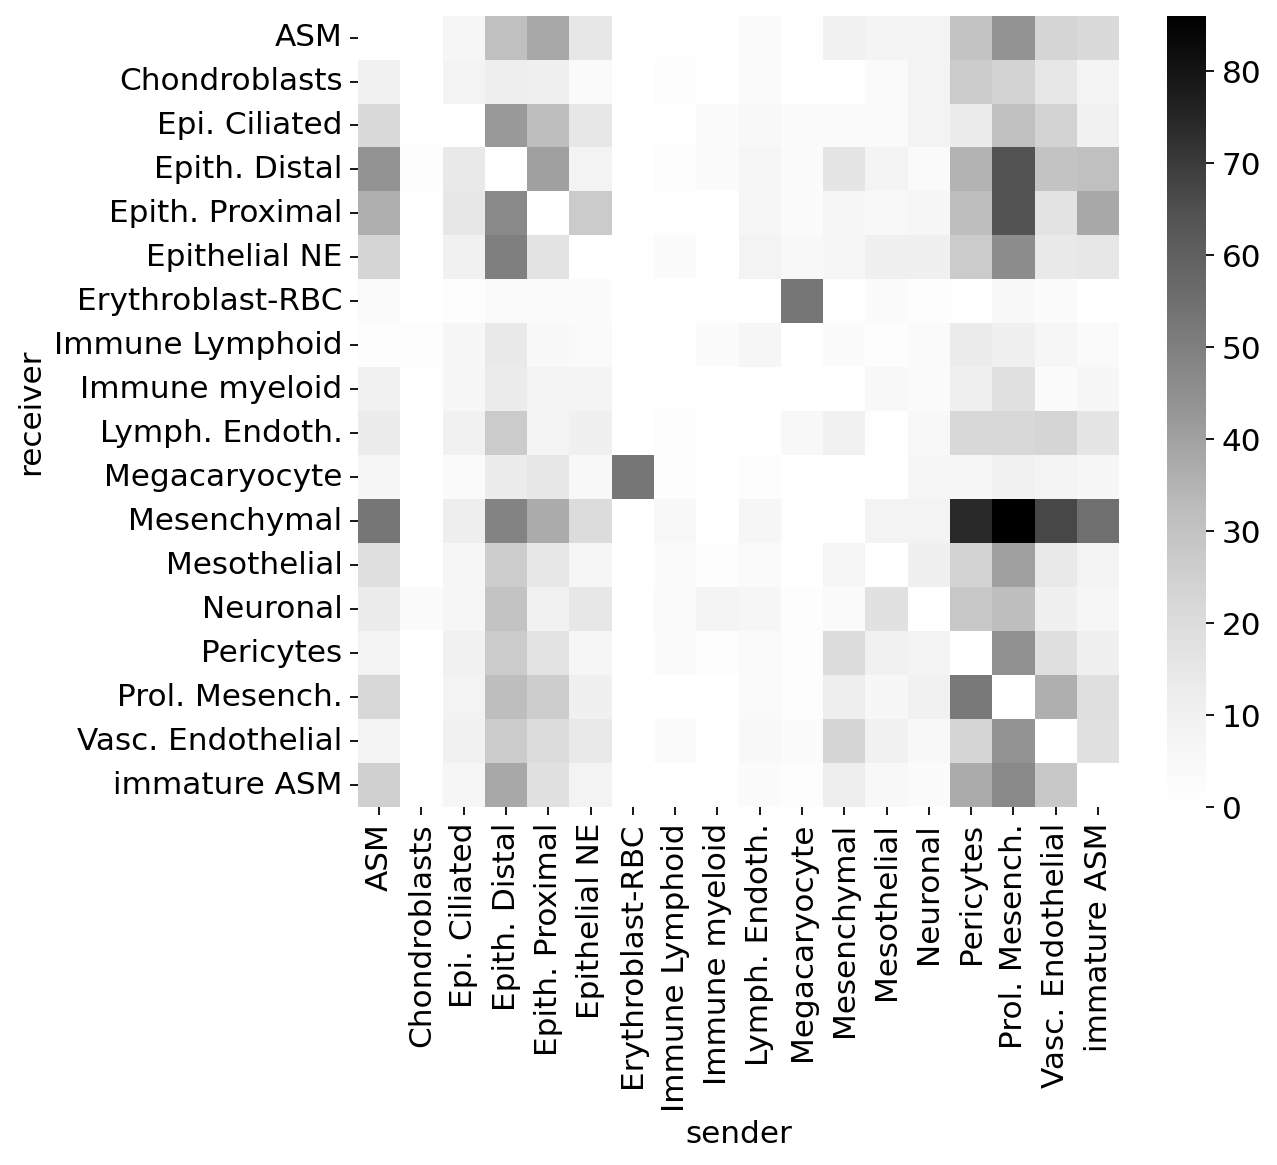

In [8]:
interpreter.type_coupling_analysis(figsize=(8.5, 7.5))

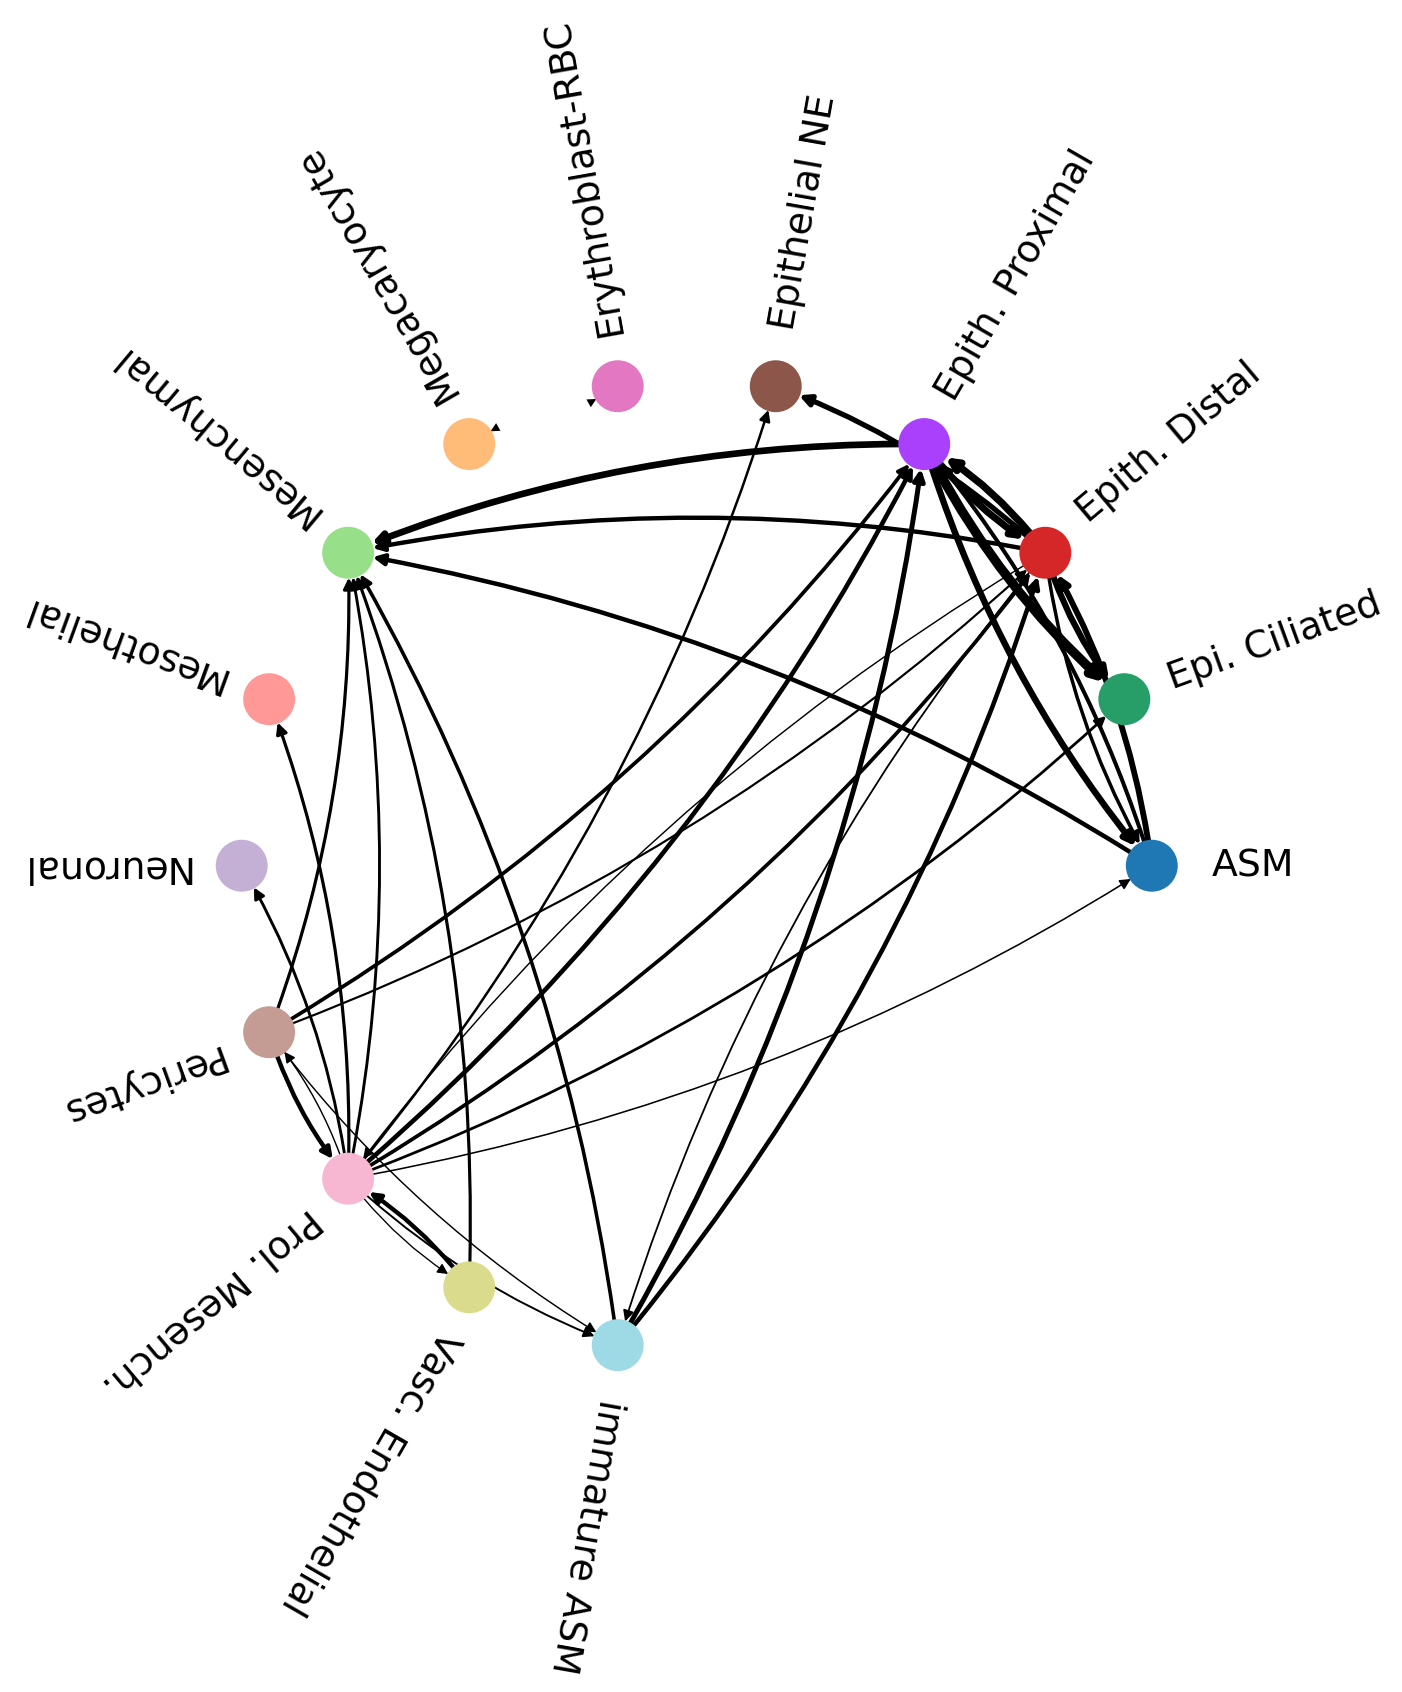

In [9]:
interpreter.type_coupling_analysis_circular(
    edge_attr='magnitude', 
    edge_width_scale=1.5,
    interaction_threshold=30,
    figsize=(9,11)
)

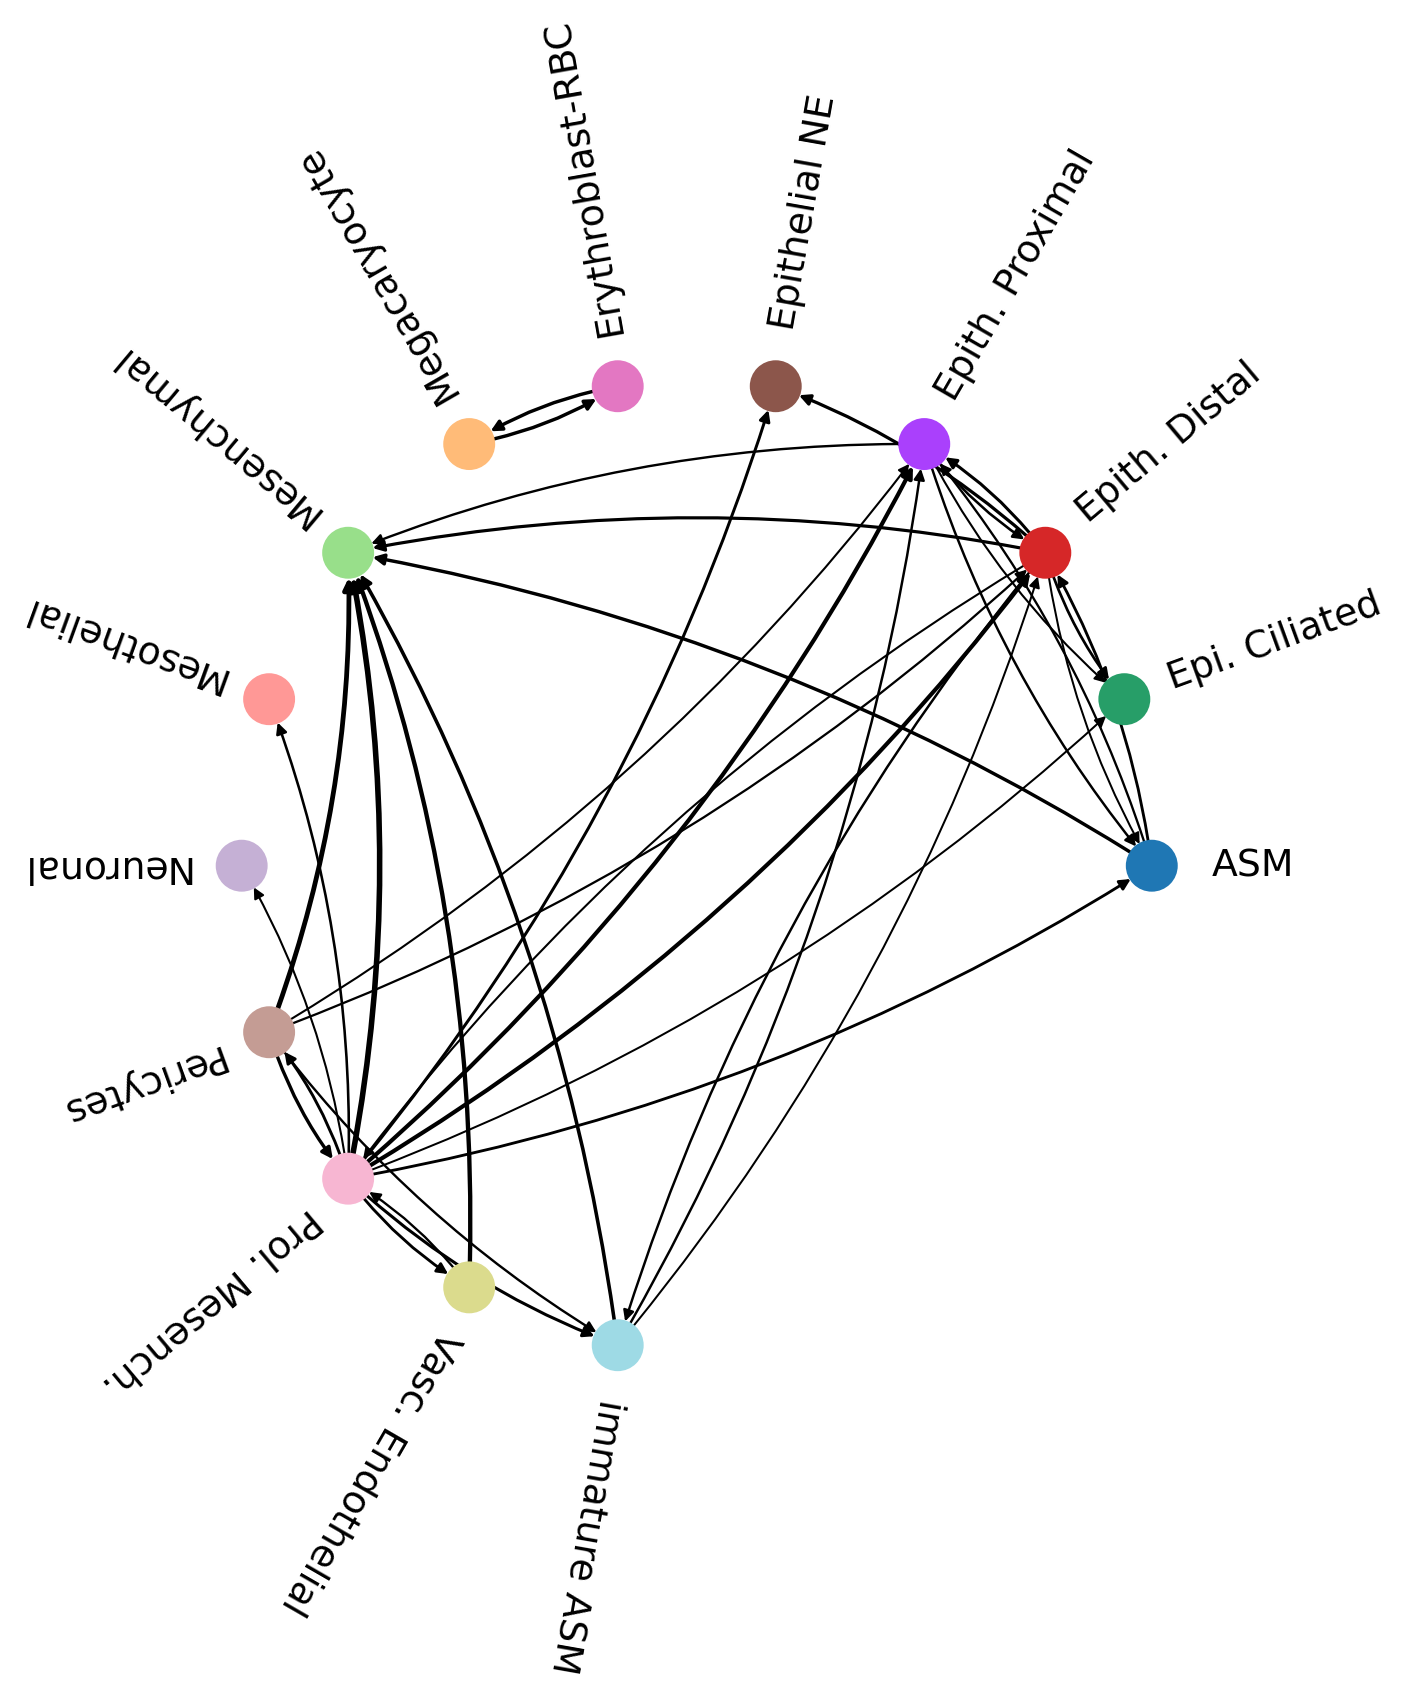

In [11]:
interpreter.type_coupling_analysis_circular(
    edge_attr='de_genes', 
    edge_width_scale=2.5,
    interaction_threshold=30,
    figsize=(9,11)
)